<a href="https://colab.research.google.com/github/KaiaX926/P-MNIST-milestone/blob/main/5241_project_0421_19pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Deep learning

In [11]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
import time
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import trange
from time import sleep
import seaborn as sns

In [13]:
def errorrate(y_pred, y_true):
    error = sum([y_pred[i]!=y_true[i] for i in range(len(y_true))])
    return error/len(y_true)

def CrossEntropy(y_pred, y_true):
    if y_true == 1:
      return -np.log(y_pred)
    else:
      return -np.log(1 - y_pred)
    return mean_bce_loss

In [123]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)#.to(device)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)#.to(device)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


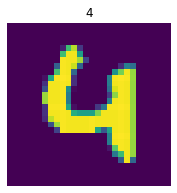

In [124]:
import matplotlib.pyplot as plt
X_test = test_data . test_data . numpy ()
Y_test = test_data . test_labels . numpy ()
image_idx = np.random.choice(range(X_test.shape[0]))
image = X_test[image_idx]
image_class = Y_test[image_idx]
plt.figure(figsize=(3, 3))
plt.imshow(X_test[image_idx].astype("uint8"))
plt.title(image_class)
_ = plt.axis("off")

In [16]:
# Define the model
# import libraries
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        hidden_1 = 100
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.output = nn.Linear(hidden_1, 10)

        #self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        # add output layer
        x = self.output(x)
        return x

# initialize the NN
model_1 = Net()
model_1 = model_1.to(device)
# model.cuda()
print(model_1)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
)


In [35]:
def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
    torch.manual_seed(seed)
    model = Net()
    model = model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=monm)

    model.train() 
    LOSS, train_ACC, test_ACC  = [],[],[]
    for epoch in trange(n_epochs, desc='New trial'):
        sleep(0.01)
        # monitor training loss
        train_loss = 0.0
        t0 = time.time()
        ###################
        # train the model #
        ###################
        for data, target in train_loader: #train_loader:train_labels = to_categorical(Y_train)
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
                
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader)
        LOSS.append(train_loss)


        train_error = 0
        for traindata, traintarget in train_loader:
            traindata = traindata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(traindata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            train_error += errorrate(pred,traintarget.numpy())/len(train_loader)
        train_ACC.append(train_error)

        test_error = 0
        for testdata, testtarget in test_loader:
            testdata = testdata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(testdata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            test_error += errorrate(pred,testtarget.numpy())/len(test_loader)
        test_ACC.append(test_error)
        

        # print('Epoch: {} \tEpoch runtime: {:.2f} \tTraining Loss: {:.6f} \tTest Loss:{:.6f}'.format(
        #     epoch+1, 
        #     time.time() - t0,
        #     train_error,
        #     test_error
        #     ))
        
        name = f"/content/{prefix}_{seed}_{lr}_{monm}.pt"
        model_scripted = torch.jit.script(model) # Export to TorchScript
        model_scripted.save(name)  
        
    return LOSS, train_ACC, test_ACC
    

# cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
# print('FINAL Test Error of a CNN is: ', errorrate(cnn_prediction,Y_test))
# print('FINAL Accuracy_score of a CNN is: ', cnn_accuracy)

In [20]:
def draw_path(trial, subs, n_epochs, train_acc, test_acc):
    fig, axes = plt.subplots(1, subs, figsize=(subs*6, 5))
    fig.suptitle('NN - 1 hidden layer')
    for i in range(len(trial)):
        # ax = 
        axes[i].set_title(trial[i])
        sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
        # ax = ax.twinx()
        # axes[i] = plt.twinx()
        sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = test_acc[i], label='test')

In [21]:
def draw_path_avg(n_epochs, train_acc, test_acc):
    train_acc_avg = np.mean(train_acc, axis=0)
    test_acc_avg = np.mean(test_acc, axis=0)

    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    fig.suptitle('NN - 1 hidden layer - mean misclassification error v.s. iteration')
    sns.lineplot( x = list(range(n_epochs)), y = train_acc_avg, color = 'orange', label='train')
    sns.lineplot( x = list(range(n_epochs)), y = test_acc_avg, label='test')


## 3.(a)
How does the network’s performance differ on the training set versus
the validation set during learning? Use the plot of training and testing error curves to
support your argument.

In [22]:
n_epochs = 5
cnn1_accuracy_summary = []
train_acc, test_acc = [],[]
lr = 0.1

trial = [123,234,345,456,567]
for seed in trial:
    LOSS, train_ACC, test_ACC = tt(seed, model_1,'modelNN1')
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)


New trial: 100%|██████████| 5/5 [01:09<00:00, 13.90s/it]


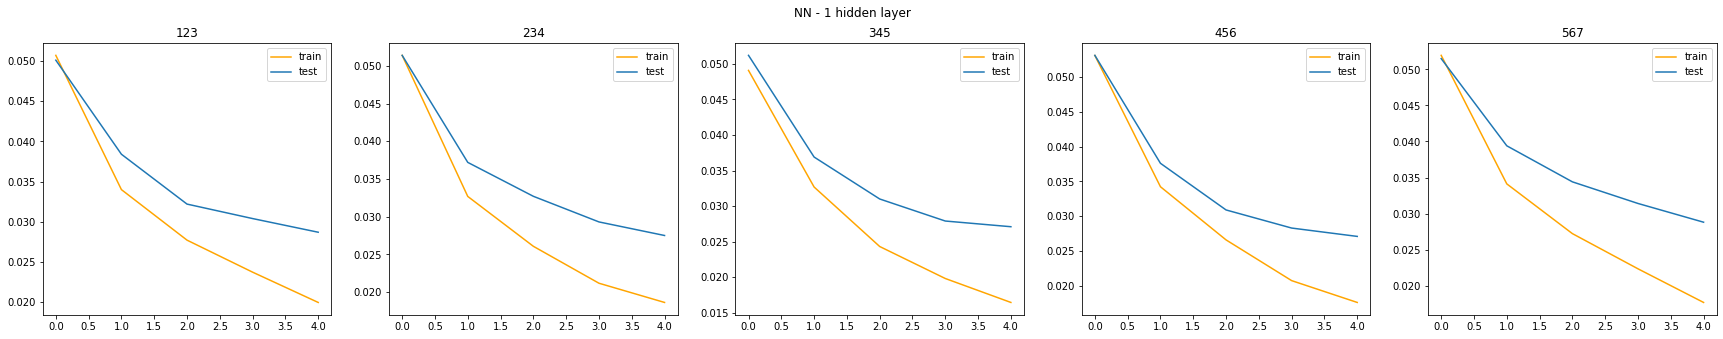

In [24]:
draw_path(trial, 5, n_epochs, train_acc, test_acc)

A: 

## 3.(b)
We could implement an alternative performance measure to the cross entropy, the mean
miss-classification error.
Plot the classification error (in percentage) vs. number of epochs, for
both training and testing. Do you observe a different behavior compared to the behavior
of the cross-entropy error function?

In [48]:
def miss_classification_loss(output, target):
    _, pred = torch.max(output, 1)
    diff = torch.eq(pred, target)/len(pred)
    loss = torch.sum(diff)
    loss.requires_grad= True
    return loss#torch.tensor(loss).to(device)

In [49]:
def miss_classification_loss(output, target):
    _, pred = torch.max(output, 1)
    for i in range(len(target)):
        loss += target
    diff = torch.eq(pred, target)/len(pred)
    loss = torch.sum(diff)
    loss.requires_grad= True
    return loss#torch.tensor(loss).to(device)

In [50]:
# n_epochs = 5
# cnn1_accuracy_summary = []
# train_acc, test_acc = [],[]
# lr = 0.1

# trial = [123,234,345,456,567]
# for seed in trial:
#     train_ACC, test_ACC = tt(seed, model_1, miss_classification_loss)
#     train_acc.append(train_ACC)
#     test_acc.append(test_ACC)

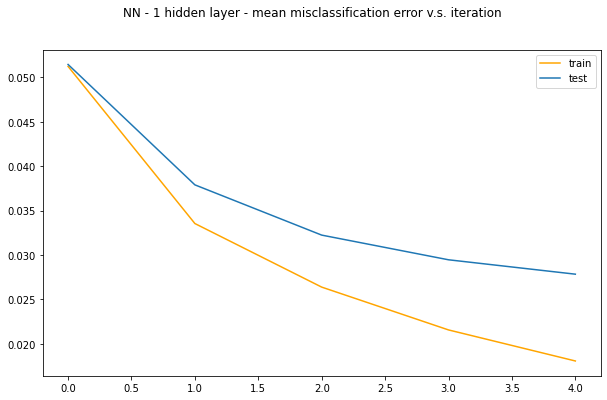

In [25]:
draw_path_avg(n_epochs, train_acc, test_acc)

## 3.(c)
Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

In [166]:
def draw_learned_W(model_best, width = 28, long = 28):

# Pick the best model
    model_weights = [] 
    conv_layers = [] 
    model_children = list(model_best.children())
    print(model_children)

    # counter to keep count of the conv layers
    counter = 0 
    # append all the conv layers and their respective weights to the list
    for i in range(len(model_children)):
        model_weights.append(model_children[i].weight.detach().cpu().numpy())
        conv_layers.append(model_children[i])

    # visualize the first conv layer filters
    model_weights = model_weights[:-1]
    plt.figure(figsize=(20, 17))
    for layer in model_weights:
        for i in range(len(layer)):
            plt.subplot(10, 10, i+1) # we have 5x5 filters and total of 16 (see printed shapes)
            filter = layer[i].reshape(width,long)
            plt.imshow(filter, cmap='viridis')
            plt.axis('off')
            # plt.savefig('filter1.png')
        plt.show()

[RecursiveScriptModule(original_name=Linear), RecursiveScriptModule(original_name=Linear)]


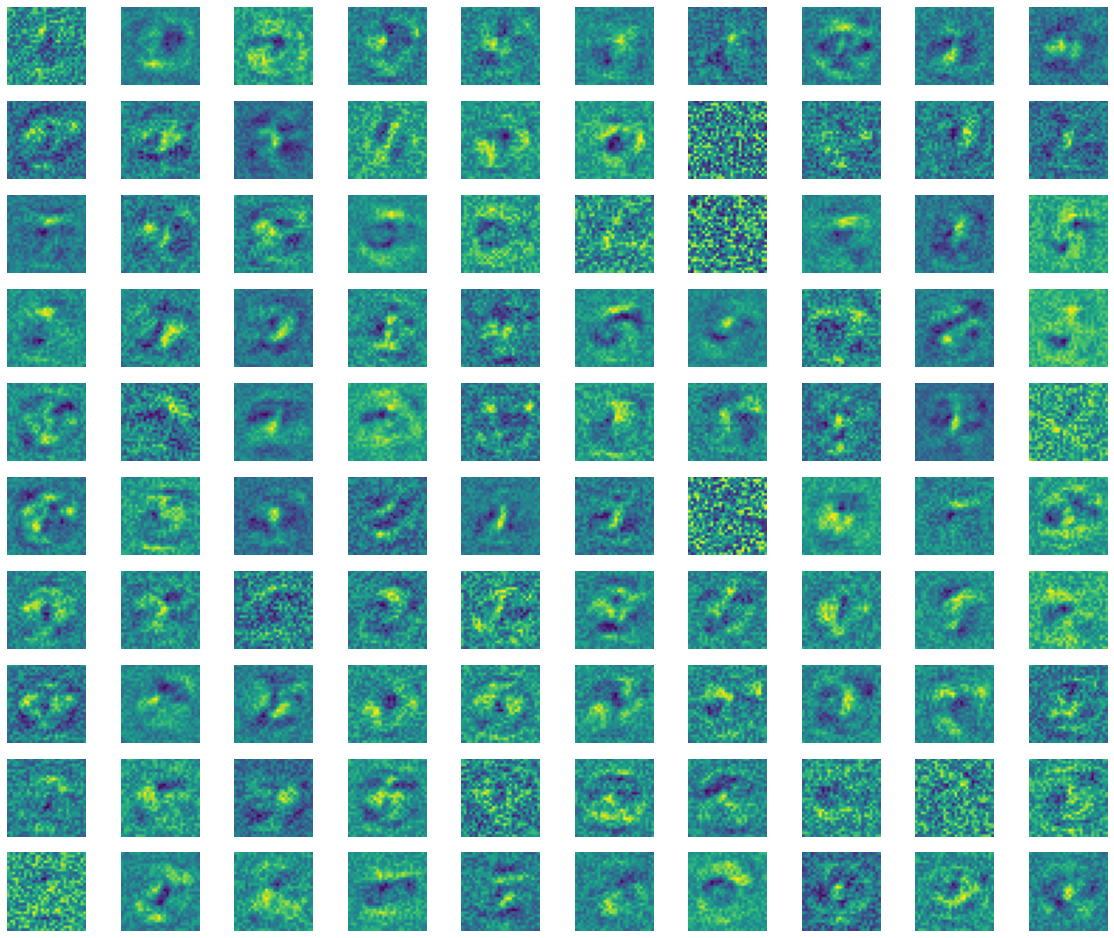

In [163]:
# Pick the best model
model_best = torch.jit.load('modelNN1_234_model.pt')
model_best.eval()
#list(model_best.children())
draw_learned_W(model_best)

## 3.(d)
Try different values of the learning rate. You should start with a learning rate of 0.1. You should then reduce it to .01, and increase it to 0.2 and 0.5. What happens to the convergence properties of the algorithm (looking at both average cross entropy and % incorrect)? Try momentum of 0.0, 0.5, 0.9. How does momentum affect convergence rate? How would you choose the best value of these parameters?

In [36]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
# def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
for i in range(len(opti_groupsLR)):
    LOSS, train_ACC, test_ACC = tt(seed = 234, model = model_1, prefix = f'modelNN1_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)


New trial: 100%|██████████| 5/5 [01:08<00:00, 13.79s/it]


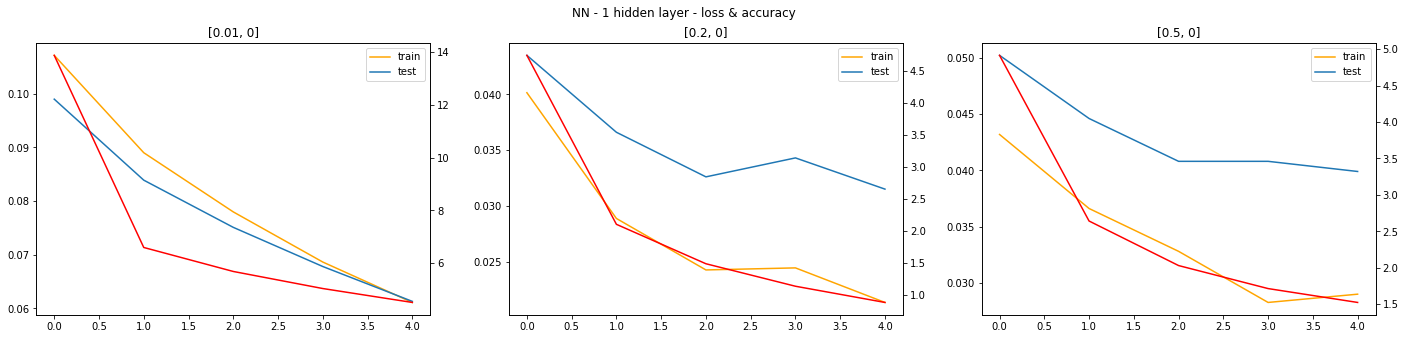

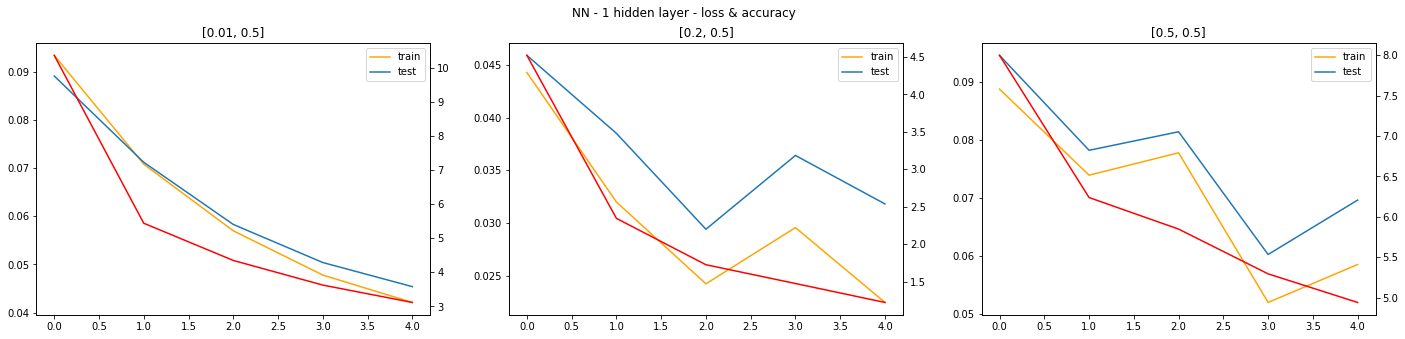

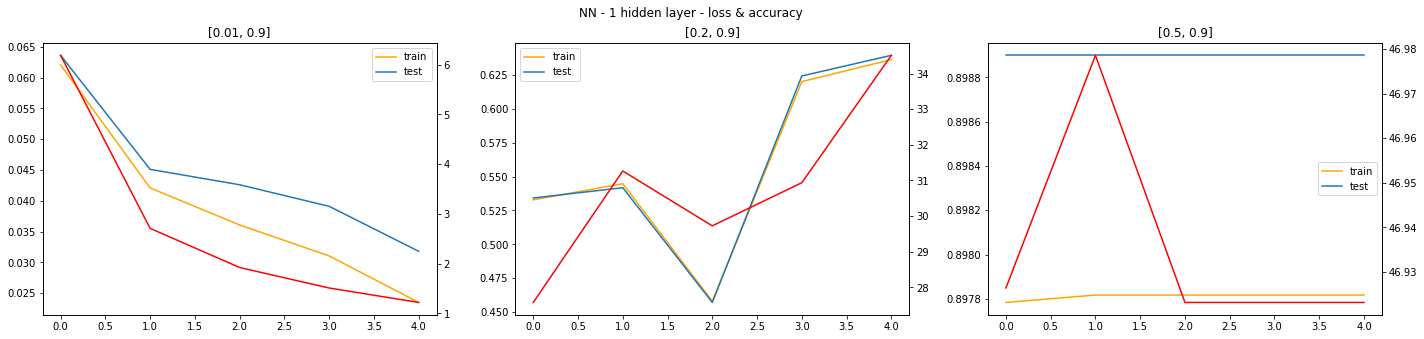

In [37]:
def draw_path_entropy(trial, subs, n_epochs, loss_groups, train_acc, test_acc):
    fig, axes = plt.subplots(1, subs, figsize=(subs*8, 5))
    fig.suptitle('NN - 1 hidden layer - loss & accuracy')
    for i in range(len(trial)):
        ax = axes[i]
        axes[i].set_title(trial[i])
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = test_acc[i], label='test')
        
        axes2 = ax.twinx()
        sns.lineplot(ax=axes2, x = list(range(n_epochs)), y = loss_groups[i], color = 'red')

for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])


## 4. 
Redo part 3(a) - 3(d) with a CNN i.e. with one 2-D convolutional layers → Relu activation → Maxpooling with appropriate hyperparameters. Compare the best result from the single layer neural network and the CNN, what could you conclude?

In [38]:
# Define the model2
# import libraries
# [20, 1, 28, 28]
# N -> the batch size
# C -> Nb of channels
# H -> Height
# W -> Width

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1,6,5, padding = 2)
        self.out = nn.Linear(6 * 14 * 14, 10)

    def forward(self, x):
        # flatten image input
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.out(x)

        return x

# initialize the NN
model_2 = Net()
model_2 = model_2.to(device)
# model.cuda()
print(model_2)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (out): Linear(in_features=1176, out_features=10, bias=True)
)


Step 1: Find the seed

New trial: 100%|██████████| 5/5 [01:13<00:00, 14.63s/it]


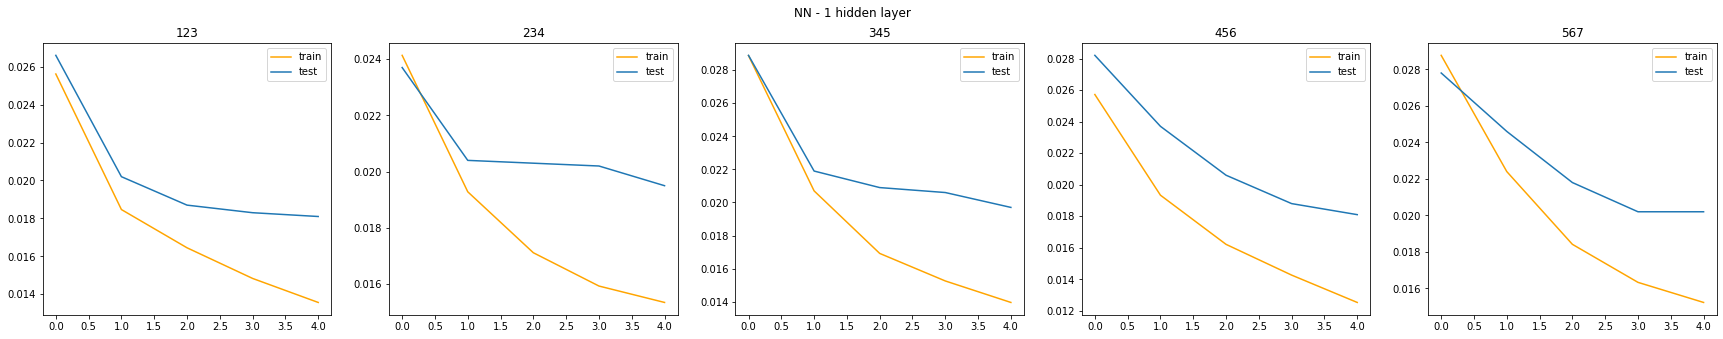

In [40]:
n_epochs = 5
cnn1_accuracy_summary = []
train_acc_conv1, test_acc_conv1 = [],[]

trial = [123,234,345,456,567]
for seed in trial:
    LOSS, train_ACC_conv1, test_ACC_conv1 = tt(seed, model_2, 'modelCONV1')
    train_acc_conv1.append(train_ACC_conv1)
    test_acc_conv1.append(test_ACC_conv1)

draw_path(trial, 5, n_epochs, train_acc_conv1, test_acc_conv1)

Step 2: Average measurement

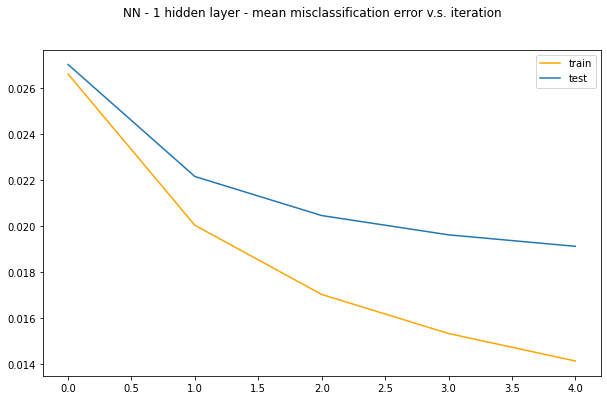

In [41]:
draw_path_avg(n_epochs, train_acc_conv1, test_acc_conv1)

In [295]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 6))
# fig.suptitle('NN - 2-D convolutional layers → Relu activation → Maxpooling')
# sns.lineplot( x = list(range(n_epochs)), y = train_ACC_conv1, color = 'orange', label='train')
# sns.lineplot( x = list(range(n_epochs)), y = test_ACC_conv1, label='test')


Step 3: Visualize your best results of the learned W

In [152]:
layer[i]

array([[[ 0.01319871, -0.16698435,  0.11525235, -0.10548027,
         -0.08449473],
        [ 0.12644716, -0.13877542,  0.04337068,  0.19033208,
          0.01386211],
        [-0.01519976, -0.152306  ,  0.13165541,  0.15068316,
         -0.14203213],
        [-0.13566081, -0.10127755,  0.17875949, -0.08049333,
         -0.03809884],
        [ 0.0365422 ,  0.07613766,  0.06570949,  0.00829239,
         -0.06232059]]], dtype=float32)

[RecursiveScriptModule(original_name=Conv2d), RecursiveScriptModule(original_name=Linear)]


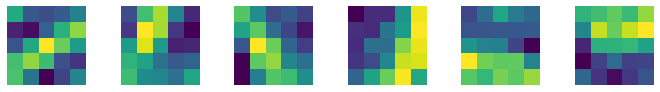

In [167]:
model_best_conv1 = torch.jit.load('modelCONV1_345_0.1_0.pt')
model_best_conv1.eval()
draw_learned_W(model_best_conv1, width = 5, long = 5)

Step 4: Try different parameters

In [52]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

for i in range(len(opti_groupsLR)):
    LOSS, train_ACC, test_ACC = tt(seed = 456, model = model_2, prefix = f'modelCONV1_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)

New trial: 100%|██████████| 5/5 [01:14<00:00, 14.86s/it]


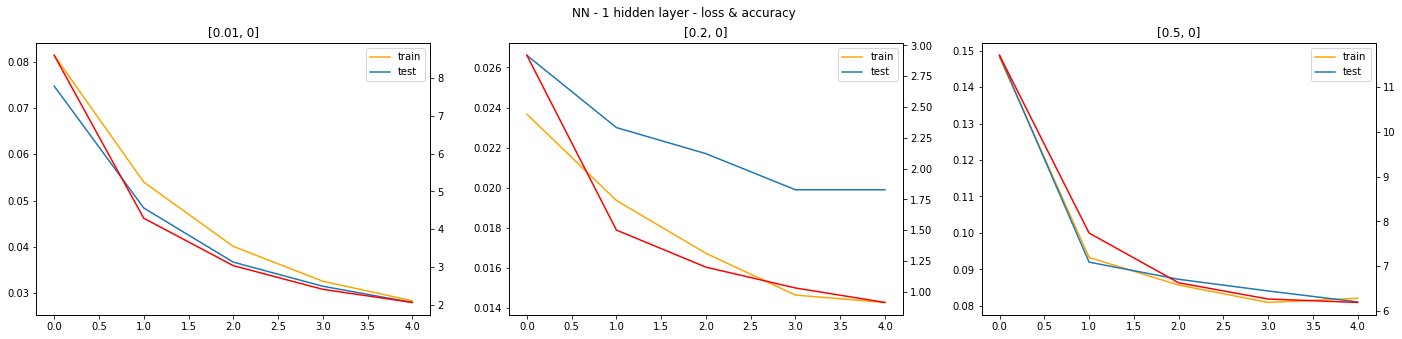

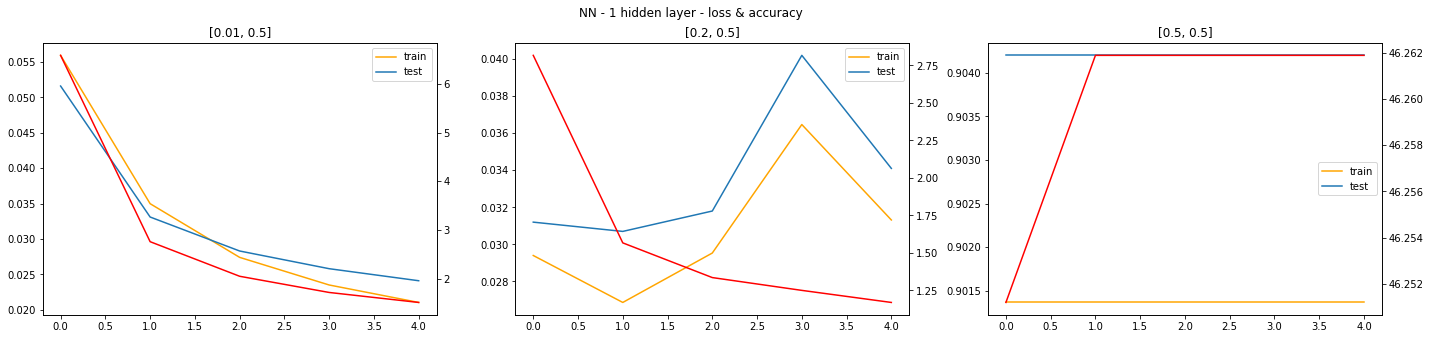

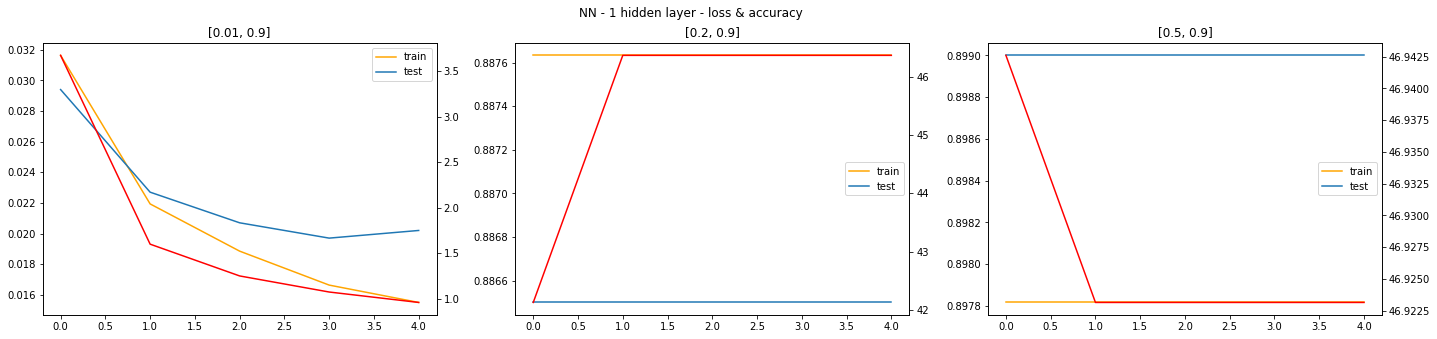

In [53]:
for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

## 5.

In [121]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Sequential(         
            nn.Conv2d(1, 64, 3),                              
            nn.ReLU(),   
            nn.Conv2d(64, 64, 3),     
            nn.ReLU(),                      
            nn.MaxPool2d((2,2)), 
            nn.BatchNorm2d(64),               
        )

        self.conv2 = nn.Sequential(         
            nn.Conv2d(64, 128, 3),     
            nn.ReLU(),  
            nn.Conv2d(128, 128, 3),     
            nn.ReLU(),                      
            nn.MaxPool2d((2,2)),
            nn.BatchNorm2d(128),                
        )

        self.conv3 = nn.Sequential(         
            nn.Conv2d(128, 256, 3),     
            nn.ReLU(),                      
            nn.MaxPool2d((2,2)), 
            nn.BatchNorm2d(256),               
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return x 

model_3 = Net()
model_3 = model_3.to(device)
# model.cuda()
print(model_3)

Net(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_

In [191]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.out = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.out(x)
        return x 

model_3 = Net()
model_3 = model_3.to(device)
# model.cuda()
print(model_3)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)


Step 1: Find the seed

New trial: 100%|██████████| 5/5 [01:42<00:00, 20.42s/it]


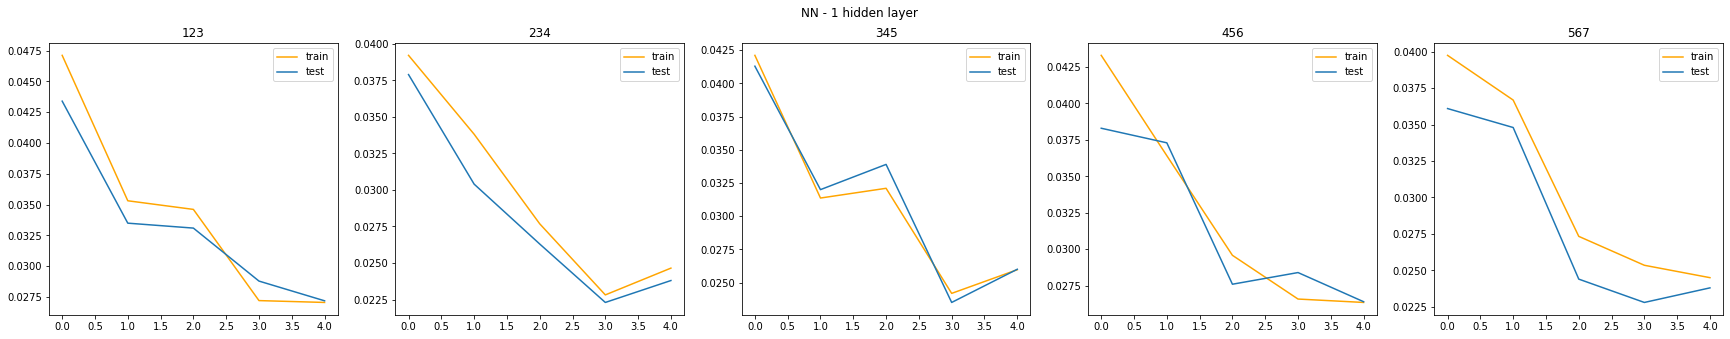

In [192]:
cnn1_accuracy_summary = []
train_acc_conv1, test_acc_conv1 = [],[]

trial = [123,234,345,456,567]
for seed in trial:
    LOSS, train_ACC_conv1, test_ACC_conv1 = tt(seed, model_3, 'modelCONV2')
    train_acc_conv1.append(train_ACC_conv1)
    test_acc_conv1.append(test_ACC_conv1)

draw_path(trial, 5, n_epochs, train_acc_conv1, test_acc_conv1)

Step 2: Average measurement

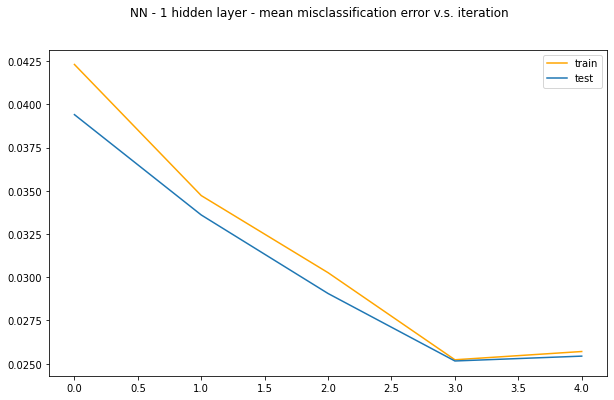

In [193]:
draw_path_avg(n_epochs, train_acc_conv1, test_acc_conv1)

In [ ]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 6))
# fig.suptitle('NN - 2-D convolutional layers → Relu activation → Maxpooling')
# sns.lineplot( x = list(range(n_epochs)), y = train_ACC_conv1, color = 'orange', label='train')
# sns.lineplot( x = list(range(n_epochs)), y = test_ACC_conv1, label='test')


Step 3: Visualize your best results of the learned W

In [195]:
model_children

[RecursiveScriptModule(original_name=Conv2d),
 RecursiveScriptModule(original_name=Conv2d),
 RecursiveScriptModule(original_name=Conv2d),
 RecursiveScriptModule(original_name=Linear),
 RecursiveScriptModule(original_name=Linear)]

In [194]:
model_best_conv2 = torch.jit.load('modelCONV2_456_0.1_0.pt')
model_best_conv2.eval()
model_weights = [] 
conv_layers = [] 
model_children = list(model_best_conv2.children())
print(model_children)
counter = 0 

# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")


# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

# visualize the first conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('../outputs/filter.png')
plt.show()

[RecursiveScriptModule(original_name=Conv2d), RecursiveScriptModule(original_name=Conv2d), RecursiveScriptModule(original_name=Conv2d), RecursiveScriptModule(original_name=Linear), RecursiveScriptModule(original_name=Linear)]
Total convolutional layers: 0


IndexError: ignored

<Figure size 1440x1224 with 0 Axes>

In [186]:
list(model_best_conv2.children().children())

AttributeError: ignored

In [173]:
layer[i].shape

(784,)

Step 4: Try different parameters

In [ ]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]
seed = 456 # the best

for i in range(len(opti_groupsLR)):
    LOSS, train_ACC, test_ACC = tt(seed = seed, model = model_2, prefix = f'modelCONV1_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)

New trial: 100%|██████████| 5/5 [01:14<00:00, 14.86s/it]


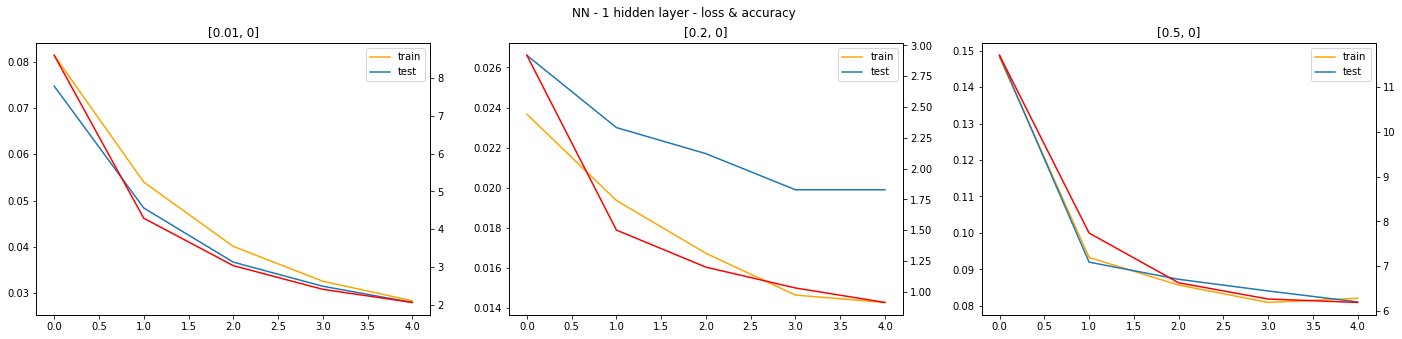

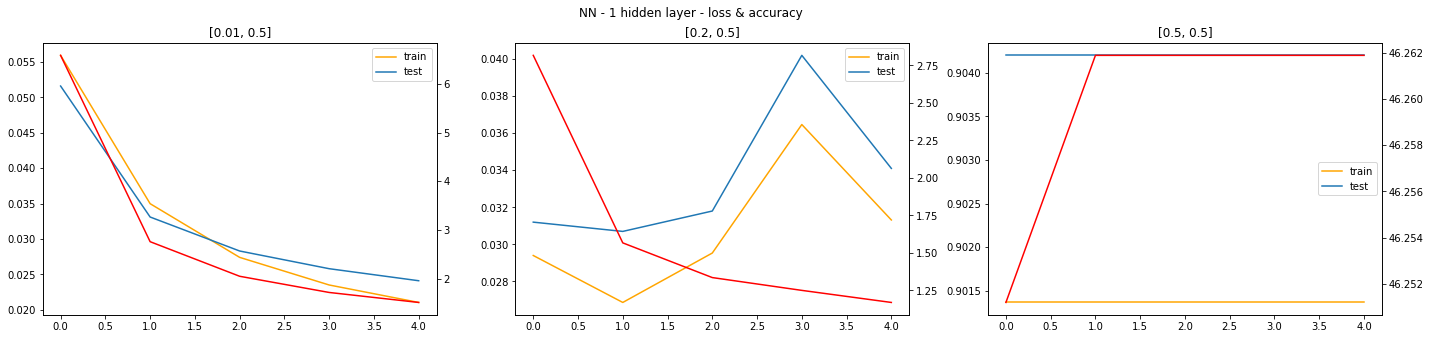

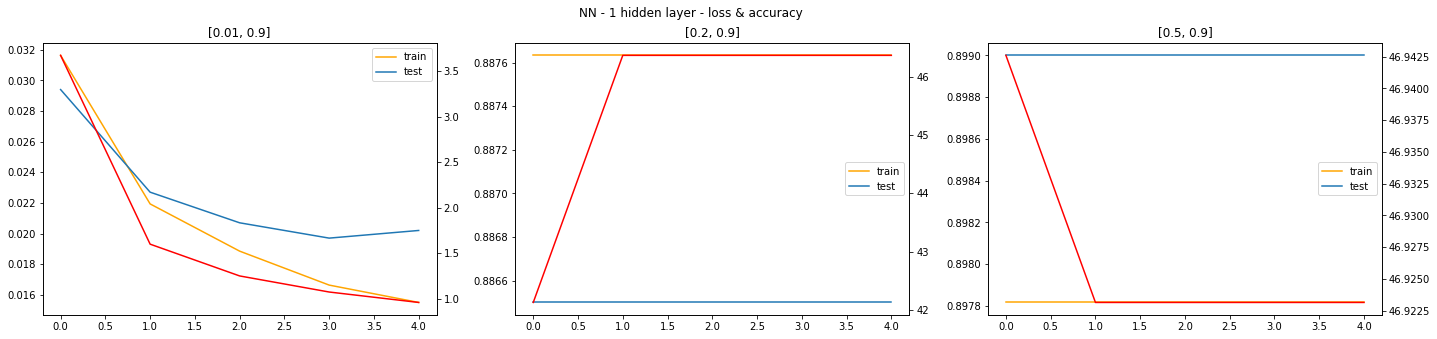

In [ ]:
for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

# 5.
In this part, you are working with train.txt, val.txt and test.txt. In particular, train.txt contains 20,000 lines and val.txt and test.txt contains 5000 lines in the same format. Each line contains 1569 coordinates, with the first 784 real-valued numbers correspond to the 784 pixel values for the first digit, next 784 real valued numbers correspond to the pixel values for the second digit.


In [86]:
train = np.genfromtxt('train.txt', delimiter=',', dtype="float64")
test = np.genfromtxt('test.txt', delimiter=',', dtype="float64")
validation =  np.genfromtxt('val.txt', delimiter=',', dtype="float64")
train.shape, validation.shape, test.shape

((20000, 1569), (5000, 1569), (5000, 1569))

## 6. 
As a warm up question, load the data and plot a few examples. Decide if the pixels were scanned out in row-major or column-major order. What is the relationship between the 2 digits and the last coordinate of each line?

A: The sum of two digits equal to the last number in each line.

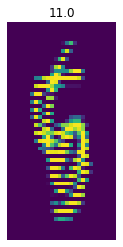

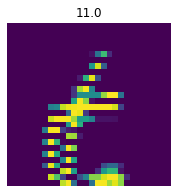

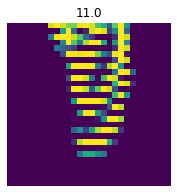

In [119]:
loc = train[np.random.randint(1,20000),:]
dig = np.reshape(loc[0:784],(28, 28))
dig2 = np.reshape(loc[784:2*784],(28, 28))
dig3 = np.concatenate((dig, dig2), axis=0)
dig3.shape
plt.imshow(dig3)
plt.title(loc[-1])  
_ = plt.axis("off")

for i in range(2):
    dig = np.reshape(loc[i*784:(i+1)*784],(28, 28))
    plt.figure(figsize=(3, 3))
    plt.imshow(dig)
    plt.title(loc[-1])  
    _ = plt.axis("off")



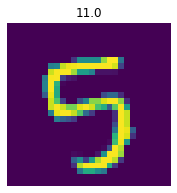

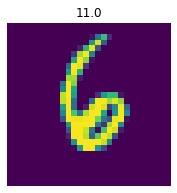

In [120]:
for res in range(2):
    #num1 = dig3[[i for i in range(len(dig3)) if i % 2 == res]]
    nums = dig3[[i for i in range(len(dig3)) if i % 2 == res]]
    plt.figure(figsize=(3, 3))
    plt.imshow(nums)
    plt.title(loc[-1])  
    _ = plt.axis("off")


## 7.
Repeat part 3(a) - 3(d) with at least two of your favorite deep learning architecture (e.g., introducing batch normalization, introducing dropout in training) with respect to with train.txt, val.txt and test.txt. In particular,
(a) Using train.txt to train your models.
(b) Using the validation error (i.e., the performance on val.txt) to select the best model.
(c) Report the generalization error (i.e., the performance on test.txt) for the model you picked. How would you compare the test errors you obtained with respect to the original MNIST data? Explain why you cannot obtain a test error lower than 1%.

In [92]:
from torch.utils.data import DataLoader, TensorDataset

# create tensor dataset
train_data2 = TensorDataset(torch.from_numpy(train[:,:-1]), torch.from_numpy(train[:,-1]))
val_data2 = TensorDataset(torch.from_numpy(validation[:,:-1]), torch.from_numpy(validation[:,:-1]))

batch_size = 20

# shuffle data
train_loader = DataLoader(train_data2, shuffle=True, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(val_data2, shuffle=True, batch_size=batch_size, drop_last=True)


In [ ]:
# Define the model2
# import libraries
# [20, 1, 28, 28]
# N -> the batch size
# C -> Nb of channels
# H -> Height
# W -> Width

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1,6,5, padding = 2)
        self.out = nn.Linear(6 * 14 * 14, 10)

    def forward(self, x):
        # flatten image input
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.out(x)

        return x

# initialize the NN
model_2 = Net()
model_2 = model_2.to(device)
# model.cuda()
print(model_2)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (out): Linear(in_features=1176, out_features=10, bias=True)
)


Step 1: Find the seed

New trial: 100%|██████████| 5/5 [01:13<00:00, 14.63s/it]


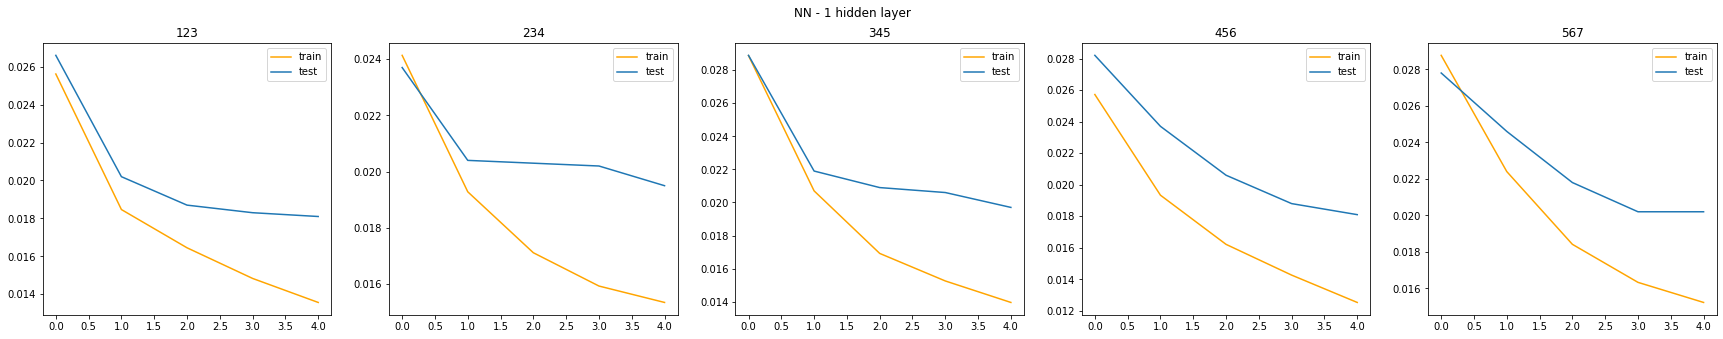

In [ ]:
n_epochs = 5
cnn1_accuracy_summary = []
train_acc_conv1, test_acc_conv1 = [],[]
lr = 0.1

trial = [123,234,345,456,567]
for seed in trial:
    LOSS, train_ACC_conv1, test_ACC_conv1 = tt(seed, model_2, 'modelCONV1')
    train_acc_conv1.append(train_ACC_conv1)
    test_acc_conv1.append(test_ACC_conv1)

draw_path(trial, 5, n_epochs, train_acc_conv1, test_acc_conv1)

Step 2: Average measurement

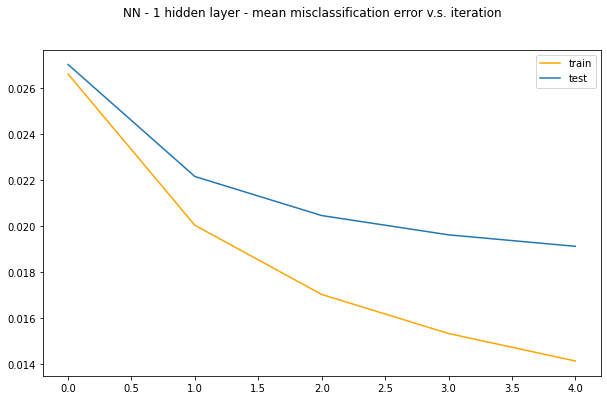

In [ ]:
draw_path_avg(n_epochs, train_acc_conv1, test_acc_conv1)

In [ ]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 6))
# fig.suptitle('NN - 2-D convolutional layers → Relu activation → Maxpooling')
# sns.lineplot( x = list(range(n_epochs)), y = train_ACC_conv1, color = 'orange', label='train')
# sns.lineplot( x = list(range(n_epochs)), y = test_ACC_conv1, label='test')


Step 3: Visualize your best results of the learned W

[RecursiveScriptModule(original_name=Conv2d), RecursiveScriptModule(original_name=Linear)]


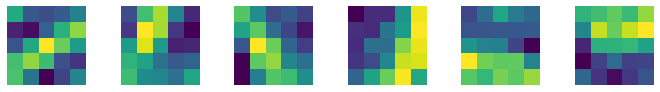

In [ ]:
model_best_conv1 = torch.jit.load('modelCONV1_345_0.1_0.pt')
model_best_conv1.eval()
draw_learned_W(model_best_conv1, width = 5, long = 5)

Step 4: Try different parameters

In [ ]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]
seed = 456 # the best

for i in range(len(opti_groupsLR)):
    LOSS, train_ACC, test_ACC = tt(seed = seed, model = model_2, prefix = f'modelCONV1_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)

New trial:  60%|██████    | 3/5 [00:45<00:30, 15.08s/it]

In [ ]:
for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

A: The performance of CNN is way better than single layer neural network